In [168]:
# Data representation and computation
import pandas as pd  
import numpy as np  
pd.options.display.float_format = '{:20,.4f}'.format

# Graph plotting
import matplotlib.pyplot as plt  
import seaborn as sns

# prophet by Facebook
from fbprophet import Prophet

# Miscellaneous
import warnings
from math import log, e, ceil
from scipy.stats import entropy
#from prettytable import PrettyTable

# Declaration
warnings.filterwarnings('ignore')
%precision 2
%matplotlib inline
sns.set(font_scale=1)

In [169]:
file_path = "Sales_Data - Only the columns we need.csv"
sales_df = pd.read_csv(file_path)
sales_df.head()


,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.6000
1,2013,7,07/04/2013,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,"2,731.5200"
2,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.8000
3,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.2000
4,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.4000


In [170]:
sales_df.shape

(35948, 16)

In [171]:
# The data is of a particular time period. 
# To read the data as a time series, we have to pass special arguments to the read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')

In [172]:
sales_df = pd.read_csv(file_path, parse_dates=['InvDate'], date_parser = dateparse)
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.6000
1,2013,7,2013-07-04,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,"2,731.5200"
2,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.8000
3,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.2000
4,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.4000


In [173]:
sales_df.shape

(35948, 16)

In [174]:
sales_df.describe()

,YEAR_,MONTH_,Product,Real_Qty,CAD_Value
count,"35,948.0000","35,948.0000","35,948.0000","35,948.0000","35,948.0000"
mean,"2,016.8881",6.5288,"600,743.3911",60.0658,"4,029.2229"
std,2.5006,3.2983,313.4058,327.3413,"13,568.9165"
min,"2,013.0000",1.0000,"600,007.0000",1.0000,0.0000
25%,"2,015.0000",4.0000,"600,627.0000",2.0000,130.7000
50%,"2,017.0000",6.0000,"600,773.5000",5.0000,490.5600
75%,"2,019.0000",9.0000,"600,919.0000",28.0000,"2,105.5760"
max,"2,021.0000",12.0000,"601,307.0000","11,520.0000","261,584.6400"


In [175]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35948 entries, 0 to 35947
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   YEAR_        35948 non-null  int64         
 1   MONTH_       35948 non-null  int64         
 2   InvDate      35948 non-null  datetime64[ns]
 3   InvNumber    35948 non-null  object        
 4   Market       35948 non-null  object        
 5   InvCustomer  35948 non-null  object        
 6   CompanyName  35948 non-null  object        
 7   ItemClass    35948 non-null  object        
 8   SubCategory  35948 non-null  object        
 9   Flavours     35948 non-null  object        
 10  Product      35948 non-null  int64         
 11  Description  35948 non-null  object        
 12  Config       35948 non-null  object        
 13  UOM          35948 non-null  object        
 14  Real_Qty     35948 non-null  int64         
 15  CAD_Value    35948 non-null  float64       
dtypes: d

In [176]:
sales_df.isna().sum()

YEAR_          0
MONTH_         0
InvDate        0
InvNumber      0
Market         0
InvCustomer    0
CompanyName    0
ItemClass      0
SubCategory    0
Flavours       0
Product        0
Description    0
Config         0
UOM            0
Real_Qty       0
CAD_Value      0
dtype: int64

In [177]:
sales_df.groupby('SubCategory')['CAD_Value'].describe()

,count,mean,std,min,25%,50%,75%,max
SubCategory,,,,,,,,
CHOC,"1,102.0000","2,182.6657","5,869.2311",0.0000,268.1800,536.3600,"2,395.8264","95,988.0000"
F&N,"30,261.0000","4,399.6510","14,199.5907",0.0000,134.0900,536.3600,"2,227.4560","261,584.6400"
GRAN,"3,388.0000","1,538.4345","6,225.9932",0.0000,9.1000,34.5600,777.6000,"94,027.2000"
LSUG,647.0000,278.9067,407.2594,0.0000,100.8000,201.1400,302.4000,"6,350.4000"
PROT,550.0000,"7,103.0887","23,553.7860",0.0000,166.4000,456.7680,998.4000,"176,256.0000"


In [178]:
sales_df.groupby('SubCategory')['Real_Qty','CAD_Value'].sum()
#sales.df.groupby('Market')['Customers', 'Sales'].sum()

,Real_Qty,CAD_Value
SubCategory,,
CHOC,19222,"2,405,297.6046"
F&N,1609668,"133,137,839.6553"
GRAN,304879,"5,212,216.0100"
LSUG,1802,"180,452.6500"
PROT,223674,"3,906,698.7880"


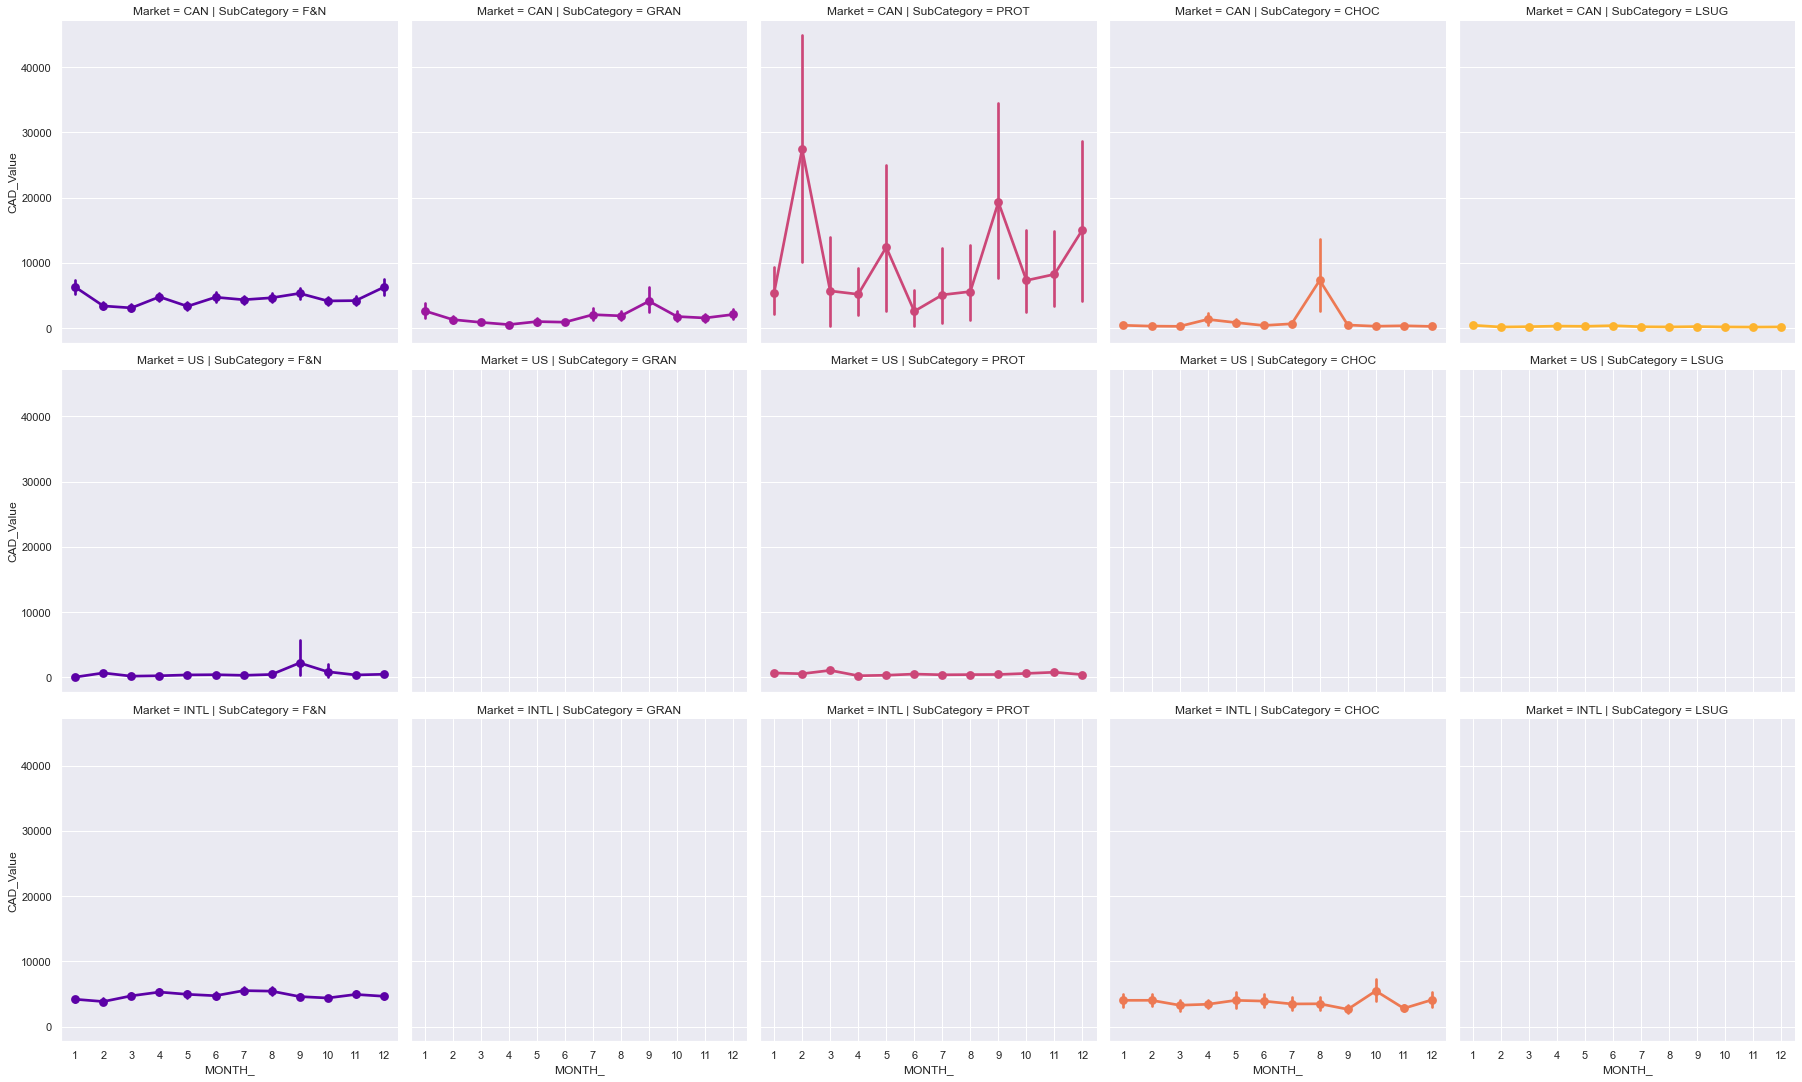

In [179]:
# sales trends
sns.factorplot(data = sales_df, x = 'MONTH_', y = "CAD_Value", 
               col = 'SubCategory', # per store type in cols
               palette = 'plasma',
               hue = 'SubCategory',
               row = 'Market')

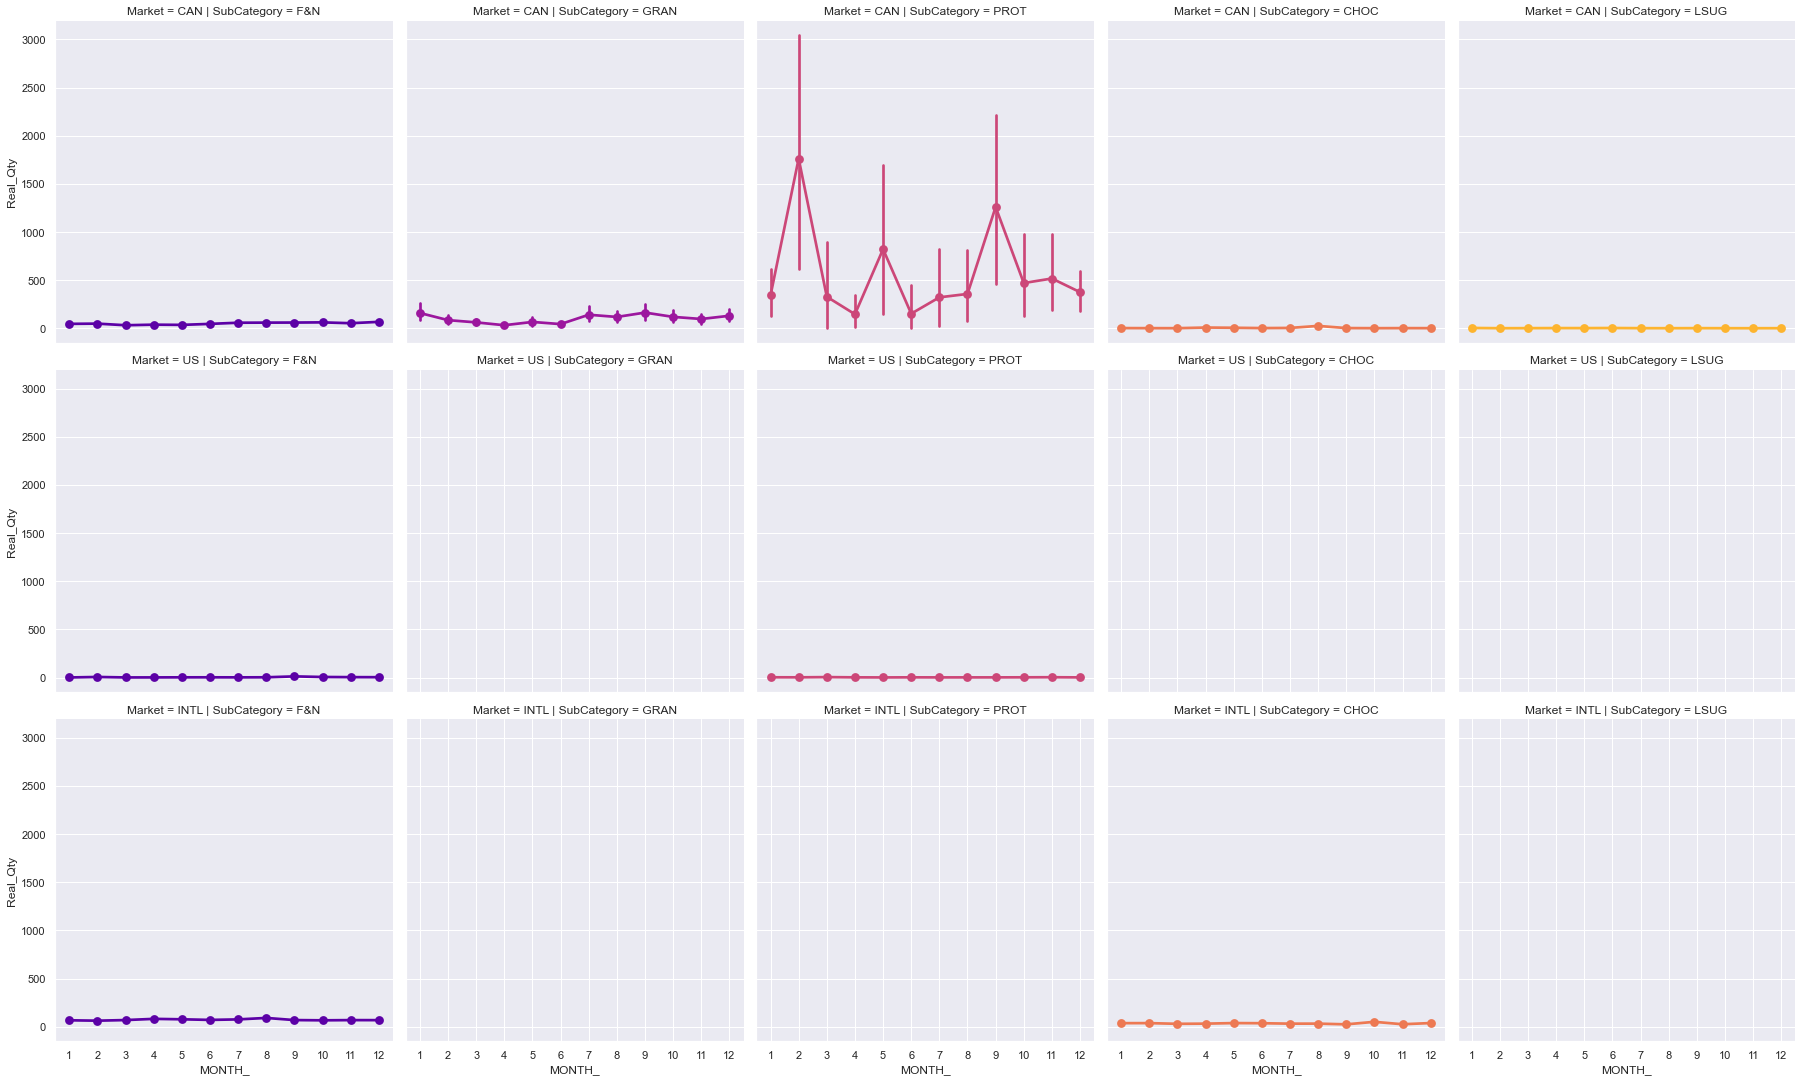

In [180]:
# sales trends
sns.factorplot(data = sales_df, x = 'MONTH_', y = "Real_Qty", 
               col = 'SubCategory', # per subcategory in cols
               palette = 'plasma',
               hue = 'SubCategory',
               row = 'Market')

In [181]:
# sales_df.loc["CAN","PROT","CAD_Value"] Trying to find our sales for CAN market and PROT subcategory

In [182]:
# sales for the CAN Market
sales = sales_df[sales_df.Market == "CAN"].loc[:,["InvDate","CAD_Value"]]

# reverse to the order: from 2013 to 2021
sales = sales.sort_index(ascending = False)

# to datetime64
sales['InvDate'] = pd.DatetimeIndex(sales['InvDate'])
sales.dtypes

InvDate      datetime64[ns]
CAD_Value           float64
dtype: object

In [183]:
# from the prophet documentation every variables should have specific names
sales = sales.rename(columns = {'InvDate': 'ds',
                                'CAD_Value': 'y'})
sales.head()

,ds,y
35947,2021-06-29,28.9900
35946,2021-06-29,57.9800
35945,2021-06-29,4.9900
35944,2021-06-29,28.9900
35943,2021-06-29,"15,924.0000"


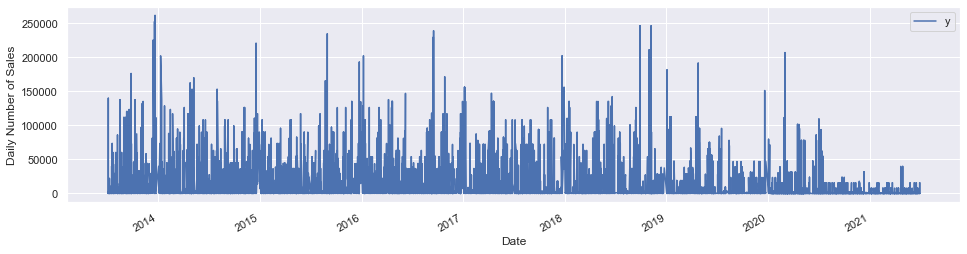

In [184]:
# Plot Daily Sales for CAN Market
ax = sales.set_index('ds').plot(figsize = (16, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [185]:
# sales for the INTL Market
sales_INTL = sales_df[sales_df.Market == "INTL"].loc[:,["InvDate","CAD_Value"]]

# reverse to the order: from 2013 to 2021
sales_INTL = sales_INTL.sort_index(ascending = False)

# to datetime64
sales_INTL['InvDate'] = pd.DatetimeIndex(sales_INTL['InvDate'])
sales_INTL.dtypes

InvDate      datetime64[ns]
CAD_Value           float64
dtype: object

In [186]:
sales_INTL = sales_INTL.rename(columns = {'InvDate': 'ds',
                                'CAD_Value': 'y'})
sales_INTL.head()

,ds,y
35924,2021-06-28,"1,350.7200"
35923,2021-06-28,731.6400
35922,2021-06-28,"4,841.2056"
35921,2021-06-28,"5,071.7392"
35920,2021-06-28,"1,547.7000"


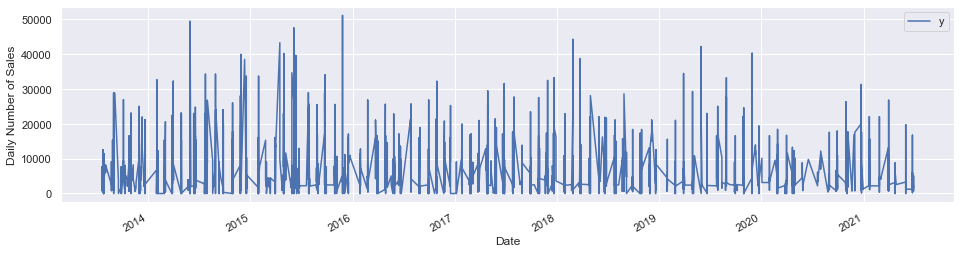

In [187]:
# Plot Daily Sales for INTL Market
ax = sales_INTL.set_index('ds').plot(figsize = (16, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [188]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
# international sales to internation markets is done at the end of the year, hence the daily seasonality is set as false
my_model = Prophet(interval_width = 0.95, daily_seasonality=False)
my_model.fit(sales)

# dataframe that extends into future 6 weeks dataframe that extends into future 8 weeks 
future_dates = my_model.make_future_dataframe(periods = 8*7)

future_dates.tail(7)

,ds
1783,2021-08-18
1784,2021-08-19
1785,2021-08-20
1786,2021-08-21
1787,2021-08-22
1788,2021-08-23
1789,2021-08-24


In [189]:
# temporary increase in time frame for the forecast to see how the the results from the fbprofpher library change

# set the uncertainty interval to 95% (the Prophet default is 80%)
# international sales to internation markets is done at the end of the year, hence the daily seasonality is set as false
my_model = Prophet(interval_width = 0.95, daily_seasonality=False)
my_model.fit(sales)

# dataframe that extends into future 6 weeks dataframe that extends into future 8 weeks 
future_dates = my_model.make_future_dataframe(periods = 48*7)

future_dates.tail(7)

,ds
2063,2022-05-25
2064,2022-05-26
2065,2022-05-27
2066,2022-05-28
2067,2022-05-29
2068,2022-05-30
2069,2022-05-31


In [190]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
# yhat - forecast
# yhat_lower - lower limit
# yhat_upper - upper limit


forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
2063,2022-05-25,"-1,536.5253","-32,205.6102","27,120.4958"
2064,2022-05-26,144.2518,"-30,132.3994","29,069.0481"
2065,2022-05-27,678.5385,"-28,425.2909","31,076.2612"
2066,2022-05-28,67.8553,"-28,918.2299","28,956.5490"
2067,2022-05-29,"-1,200.0949","-31,168.9572","27,838.4922"
2068,2022-05-30,-325.1666,"-31,949.0150","28,591.3560"
2069,2022-05-31,-422.6781,"-30,653.7416","28,210.6606"


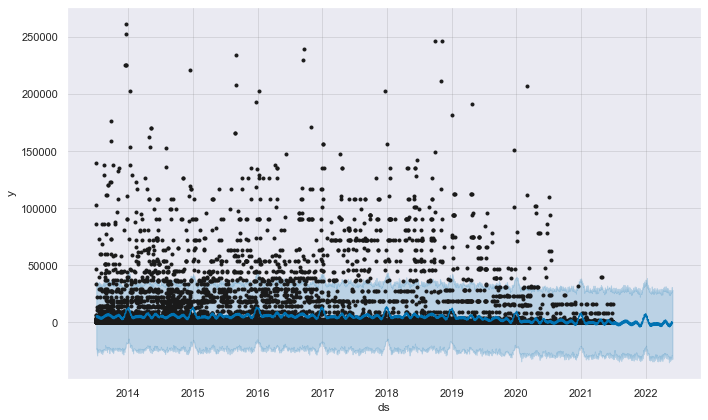

In [191]:
my_model.plot(forecast);

In [192]:
# predictions for 8 weeks only

forecast = my_model.predict(future_dates)

# preditions for last week
# yhat - forecast
# yhat_lower - lower limit
# yhat_upper - upper limit


forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
2063,2022-05-25,"-1,536.5253","-31,439.2833","28,398.8522"
2064,2022-05-26,144.2518,"-27,575.9701","27,774.7381"
2065,2022-05-27,678.5385,"-29,426.1360","29,880.3049"
2066,2022-05-28,67.8553,"-28,396.1294","27,638.2762"
2067,2022-05-29,"-1,200.0949","-28,144.2338","29,515.9199"
2068,2022-05-30,-325.1666,"-31,529.6438","30,614.8224"
2069,2022-05-31,-422.6781,"-30,184.7180","27,967.6067"


In [193]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

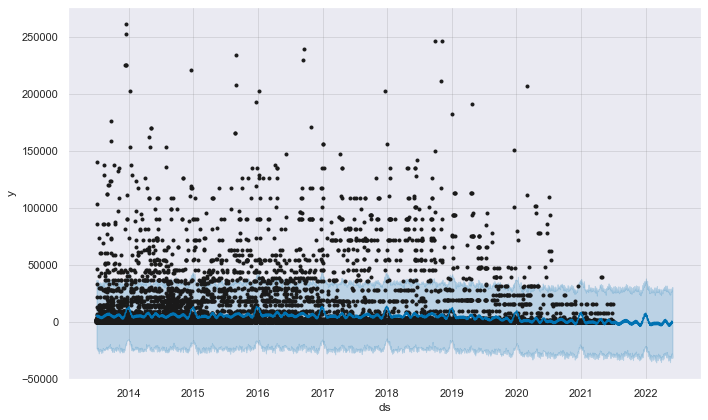

In [194]:
# visualizing predicions
# gives the preidction of what should happen. 
# Black - what has actually happned - yhat
# blue - uncertainly level
# based on the chart below, the model may not be working when data is split between the three marketing. 
# 'fpprofit' may nor may not be the best model to use, further analysis would need to be done here. 

my_model.plot(forecast);

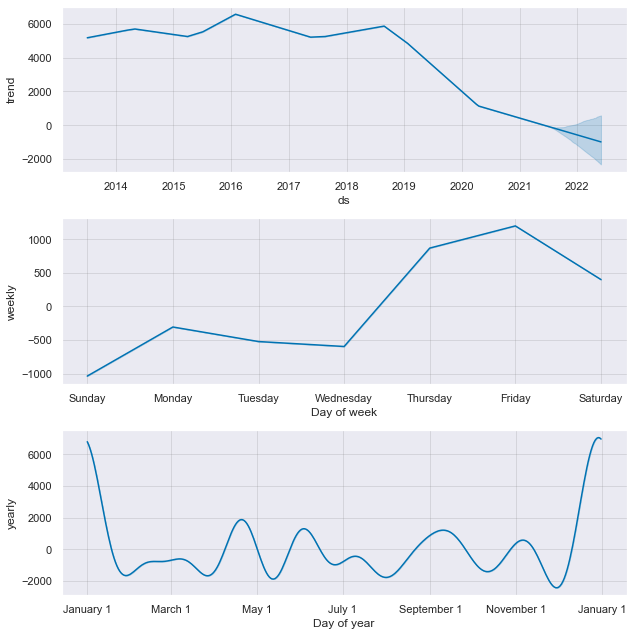

In [195]:

my_model.plot_components(forecast);

In [196]:
# set the uncertainty interval to 95% for INTL Market (the Prophet default is 80%)
my_model_INTL = Prophet(interval_width = 0.95, daily_seasonality=False)
my_model_INTL.fit(sales_INTL)

# dataframe that extends into future 6 weeks dataframe that extends into future 8 weeks 
future_dates_INTL = my_model_INTL.make_future_dataframe(periods = 8*7)

future_dates_INTL.tail(7)

,ds
428,2021-08-17
429,2021-08-18
430,2021-08-19
431,2021-08-20
432,2021-08-21
433,2021-08-22
434,2021-08-23


In [197]:
# predictions for INTL market
forecast_INTL = my_model_INTL.predict(future_dates_INTL)

# preditions for last week
forecast_INTL[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
428,2021-08-17,"5,045.3074","-5,828.7754","15,030.9626"
429,2021-08-18,"5,598.4961","-4,133.7703","15,601.4539"
430,2021-08-19,"4,687.9284","-5,577.5549","14,958.0215"
431,2021-08-20,"4,805.8891","-5,488.0046","15,071.6187"
432,2021-08-21,"3,107.6458","-7,620.6425","13,489.6872"
433,2021-08-22,"3,071.6986","-7,857.2648","13,350.3400"
434,2021-08-23,"4,400.4712","-6,223.4405","15,081.0001"


In [198]:
fc_INTL = forecast_INTL[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

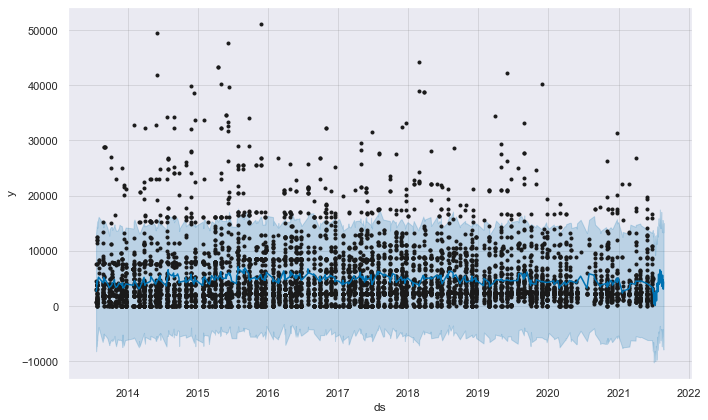

In [199]:
# visualizing predicions
my_model_INTL.plot(forecast_INTL);

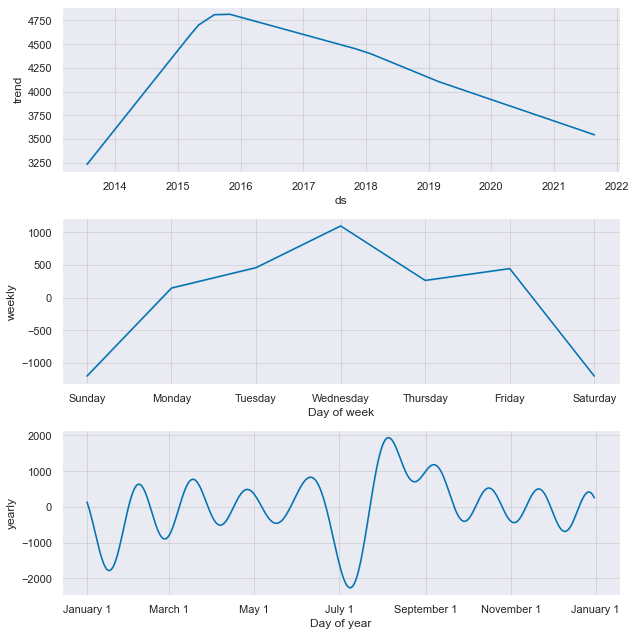

In [200]:

my_model_INTL.plot_components(forecast_INTL);

In [201]:
# sales for the US Market
sales_US = sales_df[sales_df.Market == "US"].loc[:,["InvDate","CAD_Value"]]

# reverse to the order: from 2013 to 2021
sales_US = sales_US.sort_index(ascending = False)

# to datetime64
sales_US['InvDate'] = pd.DatetimeIndex(sales_US['InvDate'])
sales_US.dtypes

InvDate      datetime64[ns]
CAD_Value           float64
dtype: object

In [202]:
sales_US = sales_US.rename(columns = {'InvDate': 'ds',
                                'CAD_Value': 'y'})
sales_US.head()

,ds,y
18889,2017-06-15,0.0000
18888,2017-06-15,0.0000
18884,2017-06-15,0.0000
18881,2017-06-15,0.0000
18102,2017-04-17,0.0000


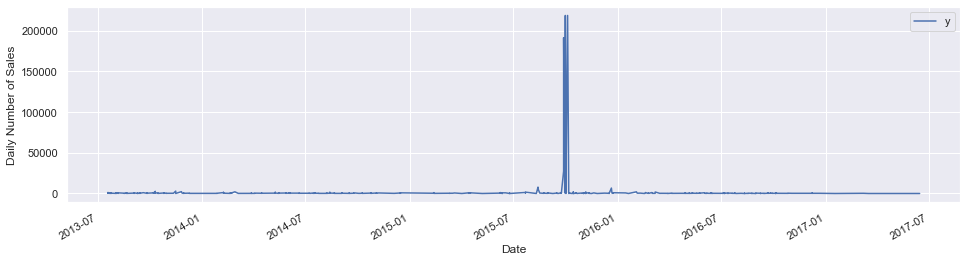

In [203]:
# Plot Daily Sales for US Market
ax = sales_US.set_index('ds').plot(figsize = (16, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [204]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model_US = Prophet(interval_width = 0.95, daily_seasonality=False)
my_model_US.fit(sales_US)

# dataframe that extends into future 6 weeks dataframe that extends into future 8 weeks 
future_dates_US = my_model_US.make_future_dataframe(periods = 8*7)

future_dates_US.tail(7)

,ds
250,2017-08-04
251,2017-08-05
252,2017-08-06
253,2017-08-07
254,2017-08-08
255,2017-08-09
256,2017-08-10


In [205]:
# predictions for US market
forecast_US = my_model_US.predict(future_dates_US)

# preditions for last week
forecast_US[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
250,2017-08-04,"-1,162.1981","-19,189.4862","15,528.4063"
251,2017-08-05,-525.5606,"-17,448.8943","16,051.6382"
252,2017-08-06,-305.8957,"-16,731.8238","16,342.2450"
253,2017-08-07,"3,221.0082","-14,765.1530","20,974.7695"
254,2017-08-08,-160.3053,"-17,409.5429","17,448.5112"
255,2017-08-09,"-1,494.4195","-19,817.1401","15,906.2541"
256,2017-08-10,825.7577,"-16,017.5300","18,576.4107"


In [206]:
fc_US = forecast_US[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

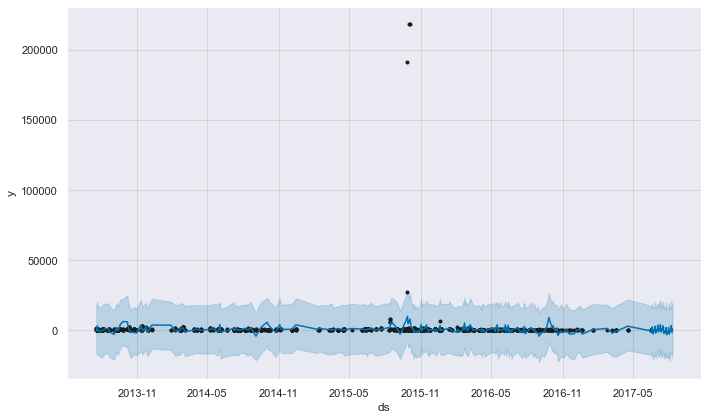

In [207]:
# visualizing predicions
my_model_US.plot(forecast_US);

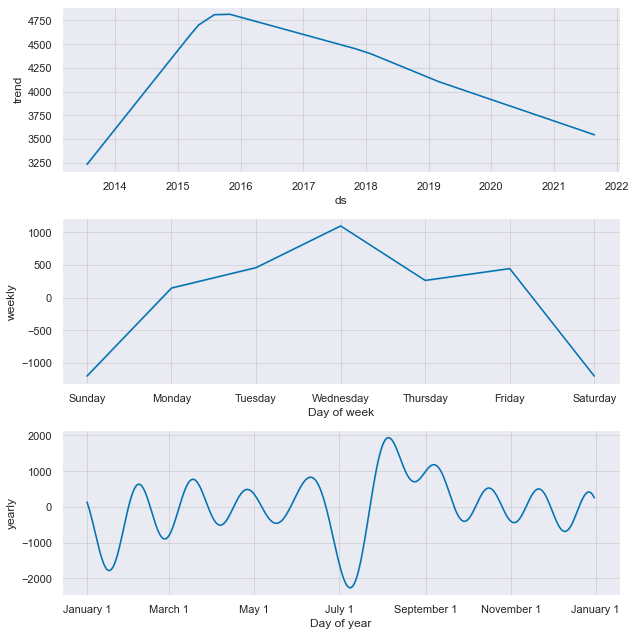

In [208]:
my_model_INTL.plot_components(forecast_INTL);

In [209]:
# Forecasting Using ARIMA

In [210]:
# Load additional dependancies for ARIMA

from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas import read_csv

import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA


In [211]:
# Loading the date set to be uses for forecasting
file_path = "Sales_Data - Only the columns we need.csv"
sales_df = pd.read_csv(file_path)
sales_df.head()


,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.6000
1,2013,7,07/04/2013,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,"2,731.5200"
2,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.8000
3,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.2000
4,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.4000


In [219]:

# Check for any missing values in sales_df
sales_df.isnull().values.any()

False

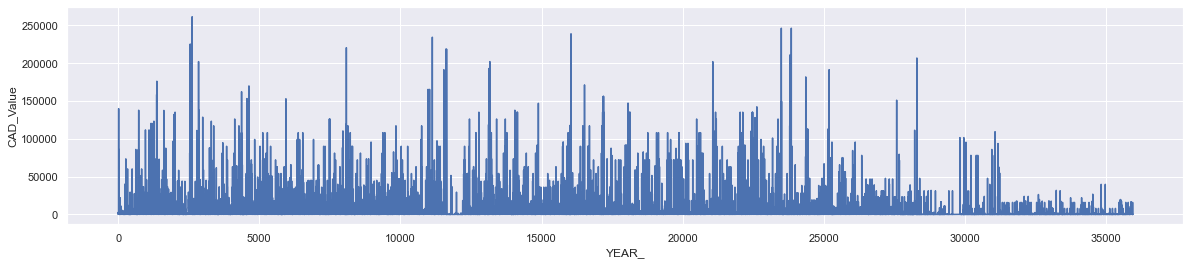

In [220]:
# Exploratory Analysis

# Using sales for all the years that avalible in the dateset

plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlabel('YEAR_')
ax.set_ylabel('CAD_Value')
plt.plot(sales_df.index, sales_df['CAD_Value']);



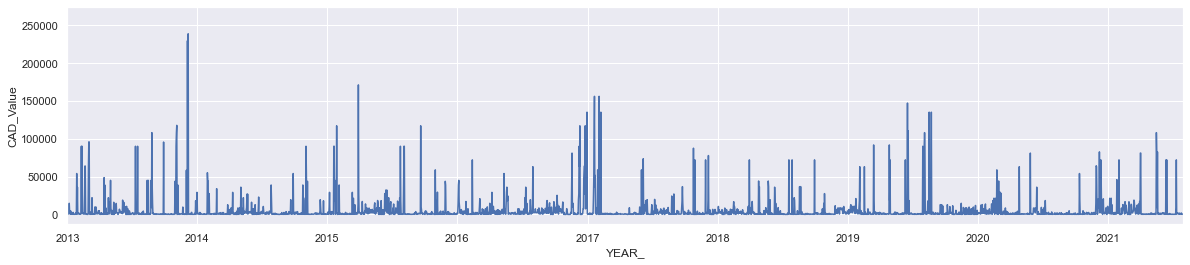

In [225]:
# Explore sales data from the most recent year


# define start and end years

start = datetime.datetime(2013,1,1)
end = datetime.datetime(2021,8,1)


plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_xlabel('YEAR_')
ax.set_ylabel('CAD_Value')
plt.plot(sales_df.index, sales_df['CAD_Value']);


# Need to check the invoice date value 